<a href="https://colab.research.google.com/github/Chris1Arnold/GTMTEST/blob/main/31_Statistical_tests_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 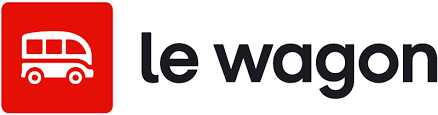

# Statistical tests

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this dataset is real data. It contains more features than what we need but lets you pratice more in the future if you want to.

You can find data description [on this website](https://www.kaggle.com/competitions/home-data-for-ml-course/data).

## Distribution


a) Download [`Iowa_housing_prices.csv`](https://drive.google.com/file/d/1YgFv1_0-xl0blchMvhtUev4vzYX0BFGs/view?usp=sharing) and import data into `df` variable.




In [4]:
import pandas as pd

csv = 'Iowa_housing_prices.csv' 

df_iowa = pd.read_csv(csv)
print(df_iowa)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fe

TypeError: ignored

b) We want to study `SalePrice` repartition.
Use Plotly Express to do so.


In [5]:
df_iowa.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [6]:
import plotly.express as px

fig = px.line(df_iowa.groupby('YrSold').mean(numeric_only=True).reset_index(), x='YrSold', y='SalePrice')
fig.show()

In [7]:
fig = px.histogram(df_iowa, x='SalePrice')
fig.show()

c) Is is a normal distribution? Are there any outlier ?

Yes there are outliers, some far above 700k

d) How do you calculate quantile with Pandas ? Calculate 10% quantile of `SalePrice` variable (the price where 10% of houses in dataset is below)

In [8]:
quantile_10 = df_iowa['SalePrice'].quantile(0.1)
quantile_20 = df_iowa['SalePrice'].quantile(0.2)
quantile_25 = df_iowa['SalePrice'].quantile(0.25)
quantile_50 = df_iowa['SalePrice'].quantile(0.50)
quantile_90 = df_iowa['SalePrice'].quantile(0.9)
quantile_list = [quantile_10, quantile_20, quantile_25, quantile_50, quantile_90]
print(quantile_list[0:3])

[106475.0, 124000.0, 129975.0]


e) Look at `histnorm` parameter of `px.histogram()` function. What does it do ? Try "probability".

In [9]:
fig = px.histogram(df_iowa, x="SalePrice", histnorm='probability')
fig.show()

f) We will now use statistics to determine if data follow a normal distribution or not. 
Execute the cell below and interpret result based on p-value.

- H0 hypothesis: sample comes from a normal distribution
- H1: H0 is false

In [10]:
from scipy import stats

# Agostino and Pearson’s test
k2, pvalue = stats.normaltest(df_iowa["SalePrice"])

print(pvalue)

2.283848353787728e-133


g) One other chart is really useful to see repartition, it is box ploting.

We want to observe relation between `OverallQual` and `SalePrice`. Create a boxplot with Plotly Express and interpret results.

In [11]:
fig=px.box(df_iowa, x='OverallQual', y='SalePrice')
fig.show()


The thing that makes this chart so powerful with Plotly Express is that for each OverallQual category we have a statistic summary of the distribution.

h) What is the third percentile of OverallQual=7 ?

i) What does lower and upper fence mean ? 

In [12]:
upper and lower limit beyond which values are considered outliers. 

SyntaxError: ignored

## Correlation

a) What does `df.corr()` do? How many features do you have ? 

Depending pandas version installed you may have only numerical features.

In [18]:
df_iowa.corr()

<ipython-input-18-b7060c1006f4>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


b) As always, it's almost impossible to use those data without a proper visualisation. Use `px.imshow()` to visualize it. 

Be careful to use width and height parameters large enough to see all houses features.

In [57]:
corr = df_iowa.corr()

fig = px.imshow(corr)

fig.update_layout(
    width=800,  # Adjust the width as needed
    height=800  # Adjust the height as needed
)

fig.show()

<ipython-input-57-68e9f8c691e5>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [25]:
corr = df_iowa.corr()

for column in corr.columns:
    for index, value in corr[column].iteritems():
        if column != index and (value > 0.5 or value < -0.5):
            if value > 0:
                print(f"{column} and {index} have a positive correlation: {value:.2f}")
            else:
                print(f"{column} and {index} have a negative correlation: {value:.2f}")

OverallQual and YearBuilt have a positive correlation: 0.57
OverallQual and YearRemodAdd have a positive correlation: 0.55
OverallQual and TotalBsmtSF have a positive correlation: 0.54
OverallQual and GrLivArea have a positive correlation: 0.59
OverallQual and FullBath have a positive correlation: 0.55
OverallQual and GarageYrBlt have a positive correlation: 0.55
OverallQual and GarageCars have a positive correlation: 0.60
OverallQual and GarageArea have a positive correlation: 0.56
OverallQual and SalePrice have a positive correlation: 0.79
YearBuilt and OverallQual have a positive correlation: 0.57
YearBuilt and YearRemodAdd have a positive correlation: 0.59
YearBuilt and GarageYrBlt have a positive correlation: 0.83
YearBuilt and GarageCars have a positive correlation: 0.54
YearBuilt and SalePrice have a positive correlation: 0.52
YearRemodAdd and OverallQual have a positive correlation: 0.55
YearRemodAdd and YearBuilt have a positive correlation: 0.59
YearRemodAdd and GarageYrBlt h

<ipython-input-25-785cb8af4c03>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

<ipython-input-25-785cb8af4c03>:4: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



c) We can now see which feature is correlated or not with `SalePrice` but between other features as well.

What is the correlation between `Id` and `SalePrice`? Why?

d) Are there any feature negatively correlated with SalePrice ?

e) What do you think of the correlation between `GrLivArea` and `SalePrice`? Is it a surprise?

f) Use `px.scatter()` function to display a scatterplot between `GrLivArea` and `SalePrice`.

In [31]:
fig=px.scatter(corr, x="GrLivArea",y="SalePrice", trendline='ols')
fig.show()

g) What does `trendline` parameter do ? 

Replot your char using it. Mouse over the chart, what do you see ?

In [33]:
fig=px.scatter(df_iowa, x="GrLivArea",y="SalePrice", trendline='lowess')
fig.show()

In [32]:
fig=px.scatter(corr, x="GrLivArea",y="SalePrice", trendline='lowess')
fig.show()

h) **Be careful, correlation doesn't mean causality !**

It's so important to keep that in mind to not take false conclusions.

Go to [this website](https://www.tylervigen.com/spurious-correlations) and pick the most absurd correlation of your choice.

## Statistical tests

Statistical tests are useful to tell us if a difference is statistically significant.

a) Let study the impact of `Neighborhood` on `SalePrice`.

Plot a histogram of `SalePrice` and pass `Neighborhood` in color parameter. Play with the chart to visually see that some Neighborhoods have different repartition.

In [36]:
fig = px.histogram(df_iowa, x="SalePrice", color='Neighborhood')
fig.show()

b) What statistical tests do you propose to verify statistically that there is a price difference between IDOTRR and ClearCr neighborhood?

Can we do a Ztest?

In [ ]:
import numpy as np
from statsmodels.stats.weightstats import ztest

# create dataframe of salary(K) 
df_price = pd.DataFrame({'marketing': np.random.normal(106,2,40),'finance':np.random.normal(108,1,40)})

# Perform Z-test
zScore, pValue = ztest(df_income['marketing'], df_income['finance'])
print(f'p-value: {pValue}') # 10e-7

In [37]:
#create individual data frames for each neighborhood we are comparing
neighborhood_idotrr = df_iowa[df_iowa['Neighborhood'] == 'IDOTRR']
neighborhood_clearcr = df_iowa[df_iowa['Neighborhood'] == 'ClearCr']

In [42]:
from statsmodels.stats.weightstats import ztest

zScore, pValue = ztest(neighborhood_idotrr['SalePrice'], neighborhood_clearcr['SalePrice'])
print(zScore)
print(pValue)
print(f'p-value: {pValue}')

-10.830419538297502
2.470209261710807e-27
p-value: 2.470209261710807e-27


c) Implement a ttest. 
What can you conclude if we accept a 5% risk?

Hint: test first if standard variation are equal to test if variances are similar 

In [ ]:
#t test example
import numpy as np
import scipy.stats as stats

# create dataframe of salary(K)
df_income = pd.DataFrame({'marketing': np.random.normal(106,2,20),'finance':np.random.normal(108,2,20)})

# Perform t-test
# if equal_var = False then Welch t-test
# here variances are equal =4
tScore, pValue = stats.ttest_ind(a=df_income['marketing'],b=df_income['finance'],equal_var=True)
print(f'p-value: {pValue}') # 0.0485

In [45]:
import numpy as np
import scipy.stats as stats

neighborhood_idotrr = df_iowa[df_iowa['Neighborhood'] == 'IDOTRR']
neighborhood_clearcr = df_iowa[df_iowa['Neighborhood'] == 'ClearCr']

tScore, pValue = stats.ttest_ind(a=neighborhood_idotrr['SalePrice'],b=neighborhood_clearcr['SalePrice'], equal_var=True)

print(f'p-value: {pValue}')

p-value: 5.080325887282466e-16


d) We will now study the influence of `Foundation` on `SalePrice`.

Make a boxplot chart of SalesPrice over foundation.

In [52]:
fig=px.box(df_iowa, x="Foundation",y="SalePrice")
fig.show()

e) How many samples are there per type of foundation ?

In [54]:
foundation_counts = df_iowa['Foundation'].value_counts()
print(foundation_counts)

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64


f) Only `Brktil`, `CBlock`and `Pconc` have enough samples to use statistical tests.

Are Houses prices significativly different among those three types of Foundation ? 
Which test should you use? What can you conclude?

In [ ]:
import scipy.stats as stats  #anova test example

# create dataframe of salary
data = {"SR1": np.random.normal(3000,100,20),
        "SR2": np.random.normal(3100,100,20),
        "SR3": np.random.normal(3500,100,20)}

# Perform anova test
aScore, pValue = stats.f_oneway(data['SR1'], data['SR2'], data['SR3'])
print(f'p-value: {pValue}') # 10e-23

In [55]:
#create individual data frames for each neighborhoodfoundation we are comparing
foundation_PConc = df_iowa[df_iowa['Foundation'] == 'PConc']
foundation_CBlock = df_iowa[df_iowa['Foundation'] == 'CBlock']
foundation_BrkTil = df_iowa[df_iowa['Foundation'] == 'BrkTil']

In [59]:
import scipy.stats as stats 

aScore, pValue = stats.f_oneway(foundation_PConc['SalePrice'], foundation_CBlock['SalePrice'], foundation_BrkTil['SalePrice'])

print(f'p-value: {pValue}')

if pvalue < 0.05:
    print("There is a significant difference in house prices among the foundation types.")
else:
    print("There is no significant difference in house prices among the foundation types.")

p-value: 1.6212905812535303e-88
There is a significant difference in house prices among the foundation types.


g) Study impact of `CentralAir`- Y or N. Which test should you use ? What can you conclude?

In [66]:
import scipy.stats as stats

# Create contingency table
CASP = pd.crosstab(df_iowa['CentralAir'], df_iowa['SalePrice'])

# Perform Chi-squared test
chiRes = stats.chi2_contingency(CASP)

# Details
print(f'p-value: {chiRes[1]}') # 0.13

p-value: 1.2257126695737677e-05


h) Study impact of `LotConfig` - Inside or Corner. Which test should you use ? What can you conclude if we accept a maximum risk of 5%?

In [72]:
import numpy as np
import scipy.stats as stats

LotConfig_inside = df_iowa[df_iowa['LotConfig'] == 'Inside']
LotConfig_corner = df_iowa[df_iowa['LotConfig'] == 'Corner']

tScore, pValue = stats.ttest_ind(a=LotConfig_inside['SalePrice'],b=LotConfig_corner['SalePrice'], equal_var=True)

print(f'p-value: {pValue}')
if pValue < 0.42: ## maximum risk increased to 42%, not done in calculations but after
    print("There is a significant association between LotConfig and saleprice.")
else:
    print("There is no significant association between LotConfig and sale price.")

p-value: 0.3843353365110296
There is a significant association between LotConfig and saleprice.


In [71]:
import numpy as np
import scipy.stats as stats

LotConfig_inside = df_iowa[df_iowa['LotConfig'] == 'Inside']
LotConfig_corner = df_iowa[df_iowa['LotConfig'] == 'Corner']

tScore, pValue = stats.ttest_ind(a=LotConfig_inside['SalePrice'],b=LotConfig_corner['SalePrice'], equal_var=True)

print(f'p-value: {pValue}')
if pValue < 0.05:
    print("There is a significant association between LotConfig and saleprice.")
else:
    print("There is no significant association between LotConfig and sale price.")

p-value: 0.3843353365110296
There is no significant association between LotConfig and sale price.


i) If we now accept a maximum risk of 42%, is the conclusion different?

j) Read [this article](https://www.nature.com/articles/d41586-019-00857-9) on why we shouldn't use only 5% risk but it's more a question on how much risk we are willing to take.

k) Dabl is a handy library that allows you to quickly visualize the relationships of all features. It shows only top 10 features but worth it for small dataset or you need to slice your data.

Execute cells below and observe charts.

PS: you migh restart your kernel to be able to see the result

In [61]:
!pip install dabl
!pip install -U matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 564.3/564.3 kB 8.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Target looks like regression


/usr/local/lib/python3.10/dist-packages/dabl/plot/utils.py:692: UserWarning:

Dropped 2 outliers in column SalePrice.

/usr/local/lib/python3.10/dist-packages/dabl/plot/supervised.py:652: UserWarning:

Discarding 2 outliers in target column.

/usr/local/lib/python3.10/dist-packages/dabl/plot/supervised.py:111: UserWarning:

Showing only top 10 continuous features.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



Showing only top 10 of 44 categorical features


[<Axes: title={'center': 'Target distribution'}, xlabel='SalePrice', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=8.09E-01'}, xlabel='OverallQual (jittered)', ylabel='SalePrice'>,
         <Axes: title={'center': 'F=7.30E-01'}, xlabel='GrLivArea'>,
         <Axes: title={'center': 'F=6.53E-01'}, xlabel='YearBuilt'>,
         <Axes: title={'center': 'F=6.48E-01'}, xlabel='GarageArea'>,
         <Axes: title={'center': 'F=6.01E-01'}, xlabel='TotalBsmtSF'>],
        [<Axes: title={'center': 'F=5.94E-01'}, xlabel='GarageYrBlt', ylabel='SalePrice'>,
         <Axes: title={'center': 'F=5.74E-01'}, xlabel='1stFlrSF'>,
         <Axes: title={'center': 'F=5.72E-01'}, xlabel='YearRemodAdd'>,
         <Axes: title={'center': 'F=5.31E-01'}, xlabel='TotRmsAbvGrd (jittered)'>,
         <Axes: title={'center': 'F=4.77E-01'}, xlabel='OpenPorchSF'>]],
       dtype=object),
 array([[<Axes: title={'center': 'F=5.32E-01'}, xlabel='SalePrice', ylabel='MSSubClass'>,
         <Axes: title={'cente

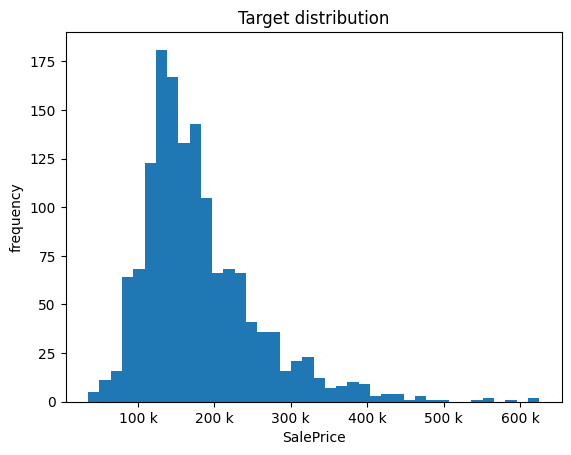

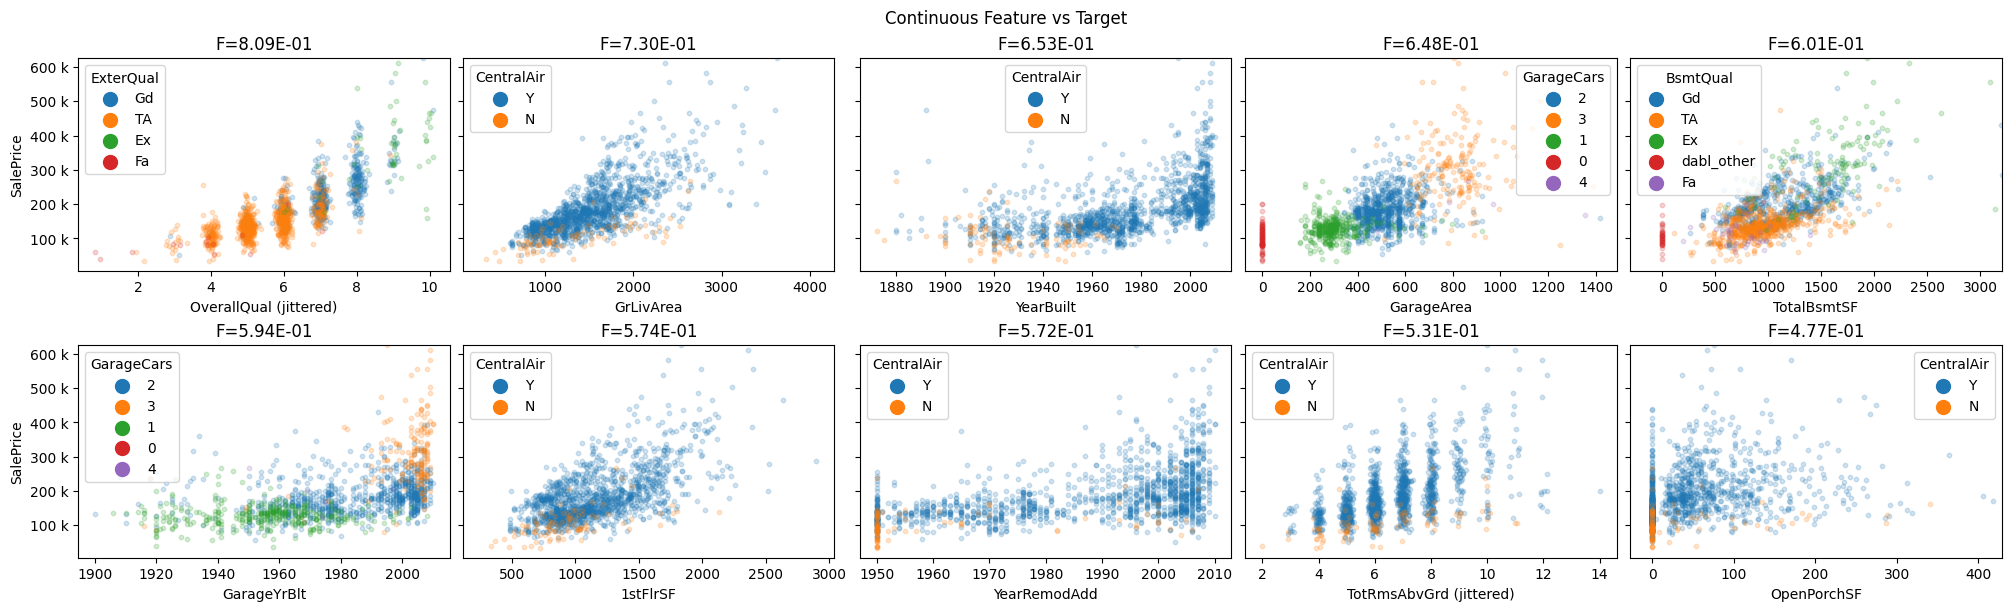

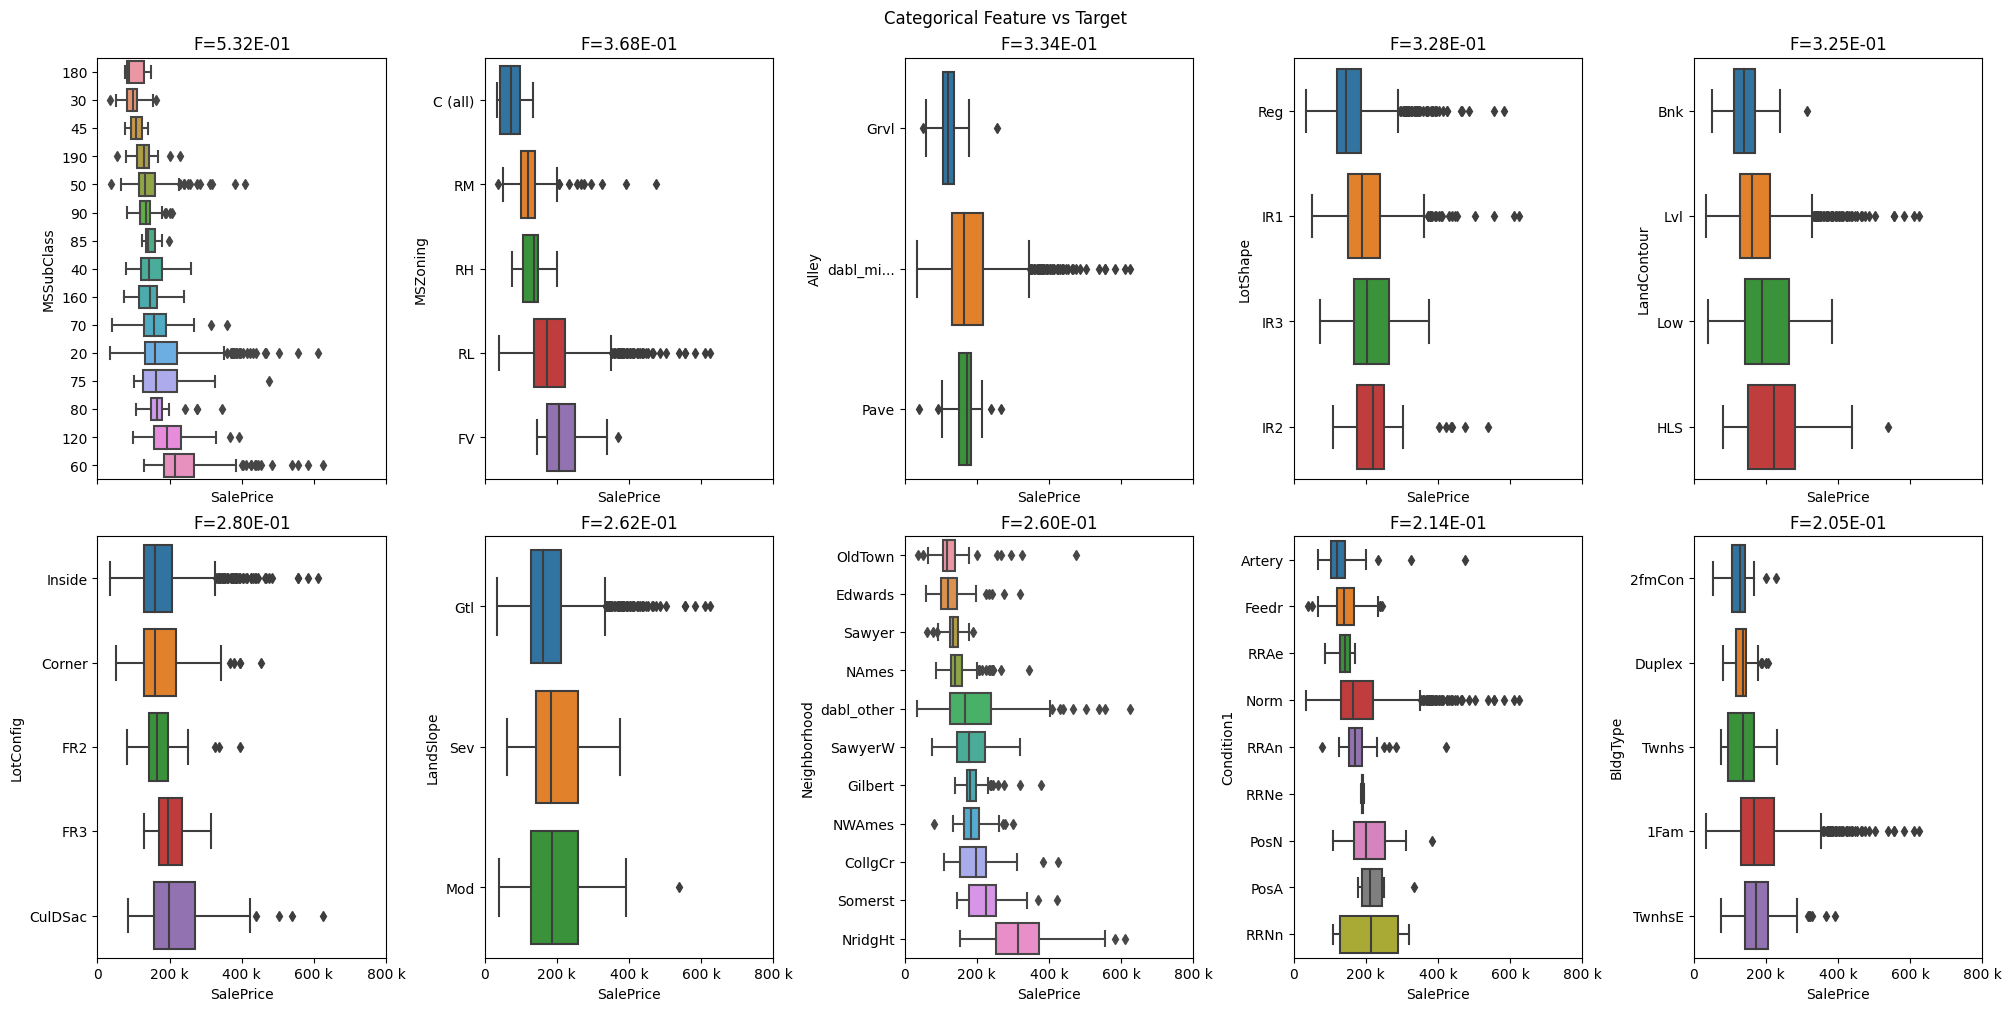

In [62]:
import dabl

dabl.plot(df_iowa, target_col = 'SalePrice', verbose=100)